#### Problem Statement

The new covid-era has provided a new way of living the work-life balance. We have seen a lot of different websites providing packages to work from different locations. From Kashmir to Kanyakumari, from Gujarat to Assam we have collected packages in and around India. It becomes really difficult to find the best place with all the amenities such as high-speed internet, a comfortable stay as well as within the budget. To solve the real-world problem of finding the best deals for a calm and enjoying workation trip. Workation is the best way to work at a remote location with a recreational and rejuvenating vacation for the team.

In this competition, one has to use the knowledge of machine learning, deep learning, and model building to predict the price per person for your next workstation trip. The data has more than 18000+ rows of different packages with the details like start location, hotel type, cost per person, destination, Itinerary, and many more.

In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings("ignore")

In [351]:
train = pd.read_csv("~/Downloads/Work/train.csv")
test = pd.read_csv("~/Downloads/Work/test.csv")

combined = pd.concat([train, test], ignore_index = True)

In [352]:
train.shape, test.shape, combined.shape

((21000, 15), (9000, 14), (30000, 15))

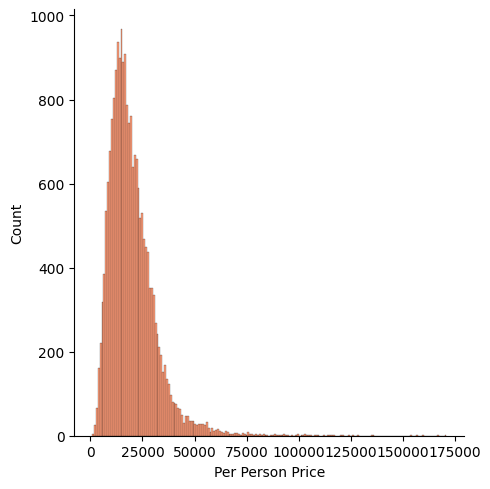

In [5]:
# Lets look into the target variable

sns.displot(x = "Per Person Price", data = combined, color = "coral")
plt.show()

# price is always skewed in Nature.

In [6]:
# lets generate the summary statistics of the target

combined["Per Person Price"].describe()

# Average cost per person is Rs. 20000 where median is 17700 and Max is 1.71 lac.

count     21000.000000
mean      20059.330381
std       11643.641766
min         791.000000
25%       12461.000000
50%       17765.500000
75%       25081.375000
max      171062.500000
Name: Per Person Price, dtype: float64

#### Date and Time

In [16]:
#pd.to_datetime(combined["Travel Date"])

# lets check the Data Types..
combined.info()

# Notice that the Travel Date is an object. 
# We need to convert it into Datetime object and then extract info

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 15 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Uniq Id                     30000 non-null  object 
 1   Package Name                30000 non-null  object 
 2   Package Type                30000 non-null  object 
 3   Destination                 30000 non-null  object 
 4   Itinerary                   30000 non-null  object 
 5   Places Covered              30000 non-null  object 
 6   Travel Date                 30000 non-null  object 
 7   Hotel Details               30000 non-null  object 
 8   Start City                  30000 non-null  object 
 9   Airline                     30000 non-null  object 
 10  Flight Stops                30000 non-null  int64  
 11  Meals                       30000 non-null  int64  
 12  Sightseeing Places Covered  30000 non-null  object 
 13  Cancellation Rules          300

In [353]:
# converting travel date into datetime

combined["Travel Date"] = pd.to_datetime(combined["Travel Date"])

In [20]:
# lets check info again
combined.info()

# Notice that Travel Date is now converted into Date time

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 15 columns):
 #   Column                      Non-Null Count  Dtype         
---  ------                      --------------  -----         
 0   Uniq Id                     30000 non-null  object        
 1   Package Name                30000 non-null  object        
 2   Package Type                30000 non-null  object        
 3   Destination                 30000 non-null  object        
 4   Itinerary                   30000 non-null  object        
 5   Places Covered              30000 non-null  object        
 6   Travel Date                 30000 non-null  datetime64[ns]
 7   Hotel Details               30000 non-null  object        
 8   Start City                  30000 non-null  object        
 9   Airline                     30000 non-null  object        
 10  Flight Stops                30000 non-null  int64         
 11  Meals                       30000 non-null  int64     

In [354]:
# Lets extract info from Travel Date ~ Date, Month and Year

combined["Date"] = combined["Travel Date"].dt.day
combined["Month"] = combined["Travel Date"].dt.month
combined["Year"] = combined["Travel Date"].dt.year

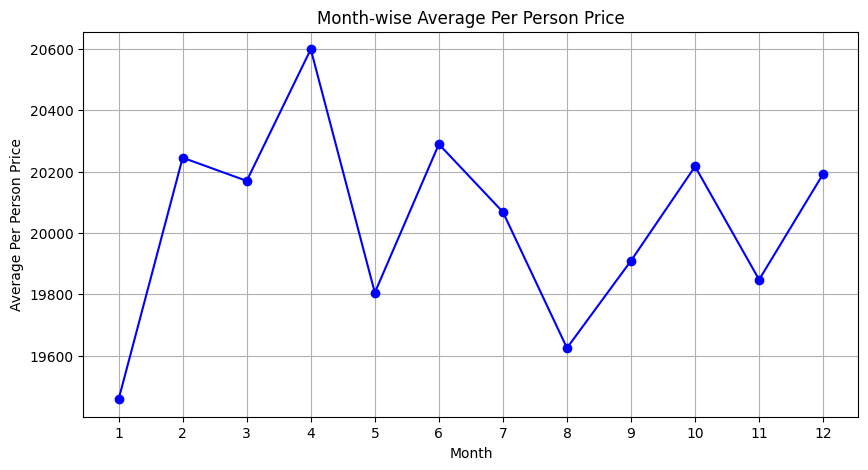

In [355]:
# Lets analyse the target variable month wise
monthly_avg_price = combined.groupby('Month')['Per Person Price'].mean()

# Plotting the line plot
plt.figure(figsize=(10, 5))
plt.plot(monthly_avg_price.index, monthly_avg_price, marker='o', color='b', linestyle='-')
plt.xlabel('Month')
plt.ylabel('Average Per Person Price')
plt.title('Month-wise Average Per Person Price')
plt.grid(True)
plt.xticks(monthly_avg_price.index)  # Set x-ticks to be the months
plt.show()


* Notice that there is spike in April, followed by Oct and Dec which suggests festive months followed by New year & thus, people to travel.

* April month is the start of Summer Season followed by Business travel as the financial year starts and hence, we see spike in the travel.

* Jan, May and August are the slow moving months as per the data.

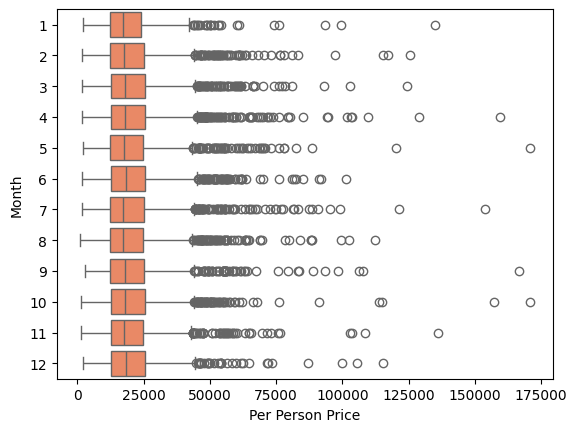

In [52]:
# lets look into Boxplot and compare the max of each month

sns.boxplot(y = "Month", x  ="Per Person Price", 
            data = combined, orient = "h", color = "coral")
plt.show()

# Peak Months - April, May, July, Sept,Oct, Nov

In [356]:
# lets create a new feature called Season

combined['Season'] = combined.Month.apply(lambda x: "Peak_Month" if \
                                          x in [4, 5, 7, 9, 10, 11] else "Normal_Month")

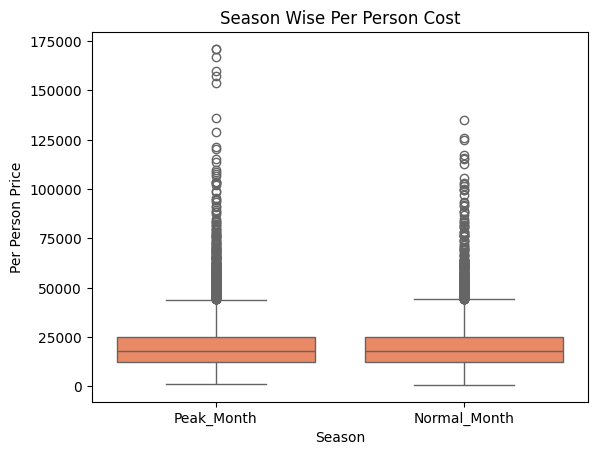

In [357]:
# lets visualize Season with Target Variable

sns.boxplot(x = "Season", y  ="Per Person Price", 
            data = combined, color = "coral")

plt.title("Season Wise Per Person Cost")
plt.show()

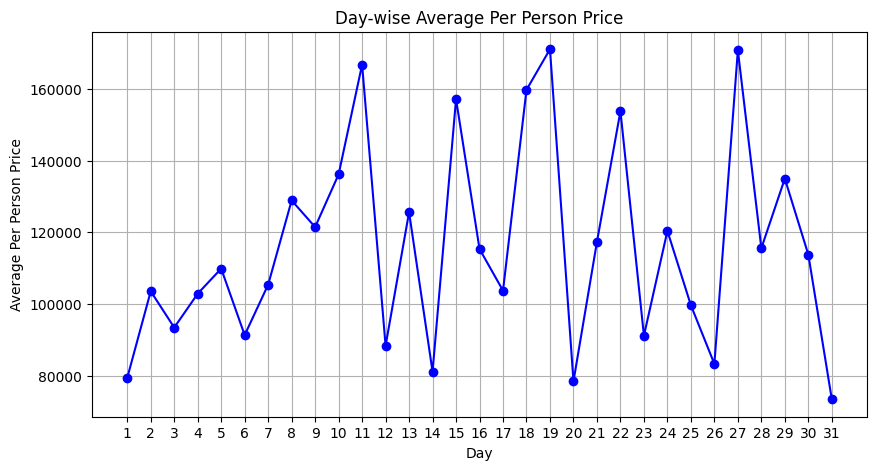

In [358]:
# Lets analyse the target variable month wise
daily_avg_price = combined.groupby('Date')['Per Person Price'].max()

# Plotting the line plot
plt.figure(figsize=(10, 5))
plt.plot(daily_avg_price.index, daily_avg_price, marker='o', color='b', linestyle='-')
plt.xlabel('Day')
plt.ylabel('Average Per Person Price')
plt.title('Day-wise Average Per Person Price')
plt.grid(True)
plt.xticks(daily_avg_price.index)  # Set x-ticks to be the months
plt.show()


# Notice the Peak Days: 10, 11, 13, 15, 18, 19, 22, 24, 27, 29

In [359]:
# Lets create a Variable Called Peak Days

combined["Peak_Days"] = combined.Date.apply(lambda x:"peak_days" \
                                            if x in [10, 11, 13, 15, 18, 19, 22, 24, 27, 29] else "normal_days")

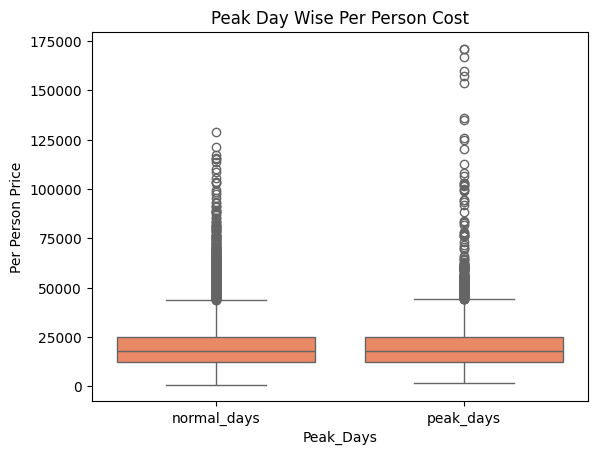

In [77]:
# lets visualize Peak Days with Target Variable

sns.boxplot(x = "Peak_Days", y  ="Per Person Price", 
            data = combined, color = "coral")

plt.title("Peak Day Wise Per Person Cost")
plt.show()

In [117]:
combined.head()

,Uniq Id,Package Name,Package Type,Destination,Itinerary,Places Covered,Travel Date,Hotel Details,Start City,Airline,...,Meals,Sightseeing Places Covered,Cancellation Rules,Per Person Price,Date,Month,Year,Season,Peak_Days,Location_Count
0,e788ab76d9d8cf1e6ed2f139645ca5d1,Best of Shimla and Manali Holiday from Delhi,Standard,New Delhi|Shimla|Manali|Chandigarh,1N New Delhi . 2N Shimla . 2N Manali . 1N Chan...,New Delhi|Shimla|Manali|Chandigarh,2021-07-30,Not Available,Mumbai,Not Available,...,3,Not Available,Not Available,11509.0,30,7,2021,Peak_Month,normal_days,4
1,178f892630ce3e335a5a41d5d83937fd,Kashmir Valley vacation,Premium,Srinagar|Pahalgam|Srinagar,1N Srinagar . 2N Pahalgam . 1N Srinagar,Srinagar|Pahalgam|Srinagar,2021-12-08,The Orchard Retreat & Spa:4.6|WelcomHotel Pine...,New Delhi,IndiGo|IndiGo,...,5,Dal Lake | Avantipura Ruins | Mughal Gardens ...,Cancellation any time after making the 1st pay...,22485.5,8,12,2021,Normal_Month,normal_days,3
2,f060f2954840503cc2fdaf495357b7df,Might of Mewar- Udaipur and Chittorgarh,Luxury,Udaipur|Chittorgarh,2N Udaipur . 1N Chittorgarh,Udaipur|Chittorgarh,2021-04-26,The Ananta:4.4|juSTa Lake Nahargarh Palace:4,New Delhi,IndiGo,...,4,Lake Pichola | Jag Mandir Palace | Saheliyon ...,Cancellation any time after making the 1st pay...,12421.5,26,4,2021,Peak_Month,normal_days,2
3,32a19a6c171e67448f2346da46c619dc,Colorful Kerala ( Romantic Getaway ),Premium,Munnar|Kumarakom|Allepey|Kovalam and Poovar,2N Munnar . 1N Kumarakom . 1N Allepey . 2N Kov...,Munnar|Kumarakom|Allepey|Kovalam and Poovar,2021-08-27,Elixir Hills Suites Resort & Spa-MMT Holidays ...,New Delhi,IndiGo,...,5,Mattupetty Dam | Echo Point | Tata Tea Museum...,Cancellation any time after making the 1st pay...,35967.0,27,8,2021,Normal_Month,peak_days,4
4,107b068aa0ca03bc6248966f594d105f,A Week In Bangkok & Pattaya,Premium,Pattaya|Bangkok,4N Pattaya . 3N Bangkok,Pattaya|Bangkok,2021-12-12,Dusit Thani Pattaya - MMT Special:4.5|Amari Wa...,New Delhi,Spicejet|Go Air,...,5,"Coral Island Tour with Indian Lunch, Join Spe...",Cancellation any time after making the 1st pay...,25584.0,12,12,2021,Normal_Month,normal_days,2


In [360]:
## Lets look into Places Covered

import nltk
from nltk.tokenize import RegexpTokenizer, word_tokenize
from nltk.corpus import stopwords
nltk.download('punkt')
nltk.download('stopwords')


combined["Places Covered"].str.split("|", expand = True)

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\mukul\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\mukul\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


,0,1,2,3,4,5,6,7,8,9,10
0,New Delhi,Shimla,Manali,Chandigarh,None,None,None,None,None,None,None
1,Srinagar,Pahalgam,Srinagar,None,None,None,None,None,None,None,None
2,Udaipur,Chittorgarh,None,None,None,None,None,None,None,None,None
3,Munnar,Kumarakom,Allepey,Kovalam and Poovar,None,None,None,None,None,None,None
4,Pattaya,Bangkok,None,None,None,None,None,None,None,None,None
...,...,...,...,...,...,...,...,...,...,...,...
29995,Munnar,Thekkady,Allepey,None,None,None,None,None,None,None,None
29996,Srinagar,Pahalgam,Srinagar,Gulmarg,None,None,None,None,None,None,None
29997,Dharamshala,Dalhousie,None,None,None,None,None,None,None,None,None
29998,Jaipur,Jodhpur,Jaisalmer,Udaipur,None,None,None,None,None,None,None


In [361]:
# Lets make a function to apply regex and then use numpy to count the locations
def regex_tokens(text):
    regex = RegexpTokenizer("[^|]+")
    count_locs = np.count_nonzero(regex.tokenize(text))
    return(count_locs)
    
np.count_nonzero(regex.tokenize(combined["Places Covered"][29996]))

4

In [362]:
combined["Location_Count"]=  combined["Places Covered"].apply(regex_tokens)

In [363]:
combined.groupby("Location_Count")["Per Person Price"].describe()

,count,mean,std,min,25%,50%,75%,max
Location_Count,,,,,,,,
1,5363.0,15491.306452,11571.807031,791.0,8319.000,12284.50,19071.500,170763.0
2,5332.0,18394.195986,10258.153395,3760.5,11431.250,15861.00,22219.750,105395.5
3,5565.0,21843.033423,11052.069799,5445.5,14826.000,19513.00,25978.000,171062.5
4,3363.0,23498.121023,10032.965295,6779.0,16482.000,22036.00,28068.250,157143.0
5,1049.0,28018.776454,14792.798465,11984.5,19685.000,25053.00,31212.000,166758.0
6,177.0,28593.305085,10179.390980,14167.5,19873.000,27419.00,32560.500,74716.0
7,102.0,31559.764706,8606.880193,14440.0,25910.625,31606.75,35832.500,64803.0
8,12.0,35279.791667,2968.036514,31248.0,33689.125,34561.25,36482.125,40261.5
9,31.0,37108.564516,5937.877328,26767.5,32391.500,36598.00,39007.750,51270.0


In [364]:
combined.loc[combined.Location_Count==11, "Places Covered"]

2431     Agra|Bharatpur|Jaipur|Nawalgarh|Jodhpur|Jaisal...
6922     Agra|Bharatpur|Jaipur|Nawalgarh|Jodhpur|Jaisal...
7019     Agra|Bharatpur|Jaipur|Nawalgarh|Jodhpur|Jaisal...
15983    Agra|Bharatpur|Jaipur|Nawalgarh|Jodhpur|Jaisal...
16026    Agra|Bharatpur|Jaipur|Nawalgarh|Jodhpur|Jaisal...
16579    Agra|Bharatpur|Jaipur|Nawalgarh|Jodhpur|Jaisal...
24457    Agra|Bharatpur|Jaipur|Nawalgarh|Jodhpur|Jaisal...
28984    Agra|Bharatpur|Jaipur|Nawalgarh|Jodhpur|Jaisal...
29029    Agra|Bharatpur|Jaipur|Nawalgarh|Jodhpur|Jaisal...
Name: Places Covered, dtype: object

In [365]:
combined.loc[2431, "Places Covered"]

'Agra|Bharatpur|Jaipur|Nawalgarh|Jodhpur|Jaisalmer|Jodhpur|Kumbalgarh|Udaipur|Ajmer|Pushkar'

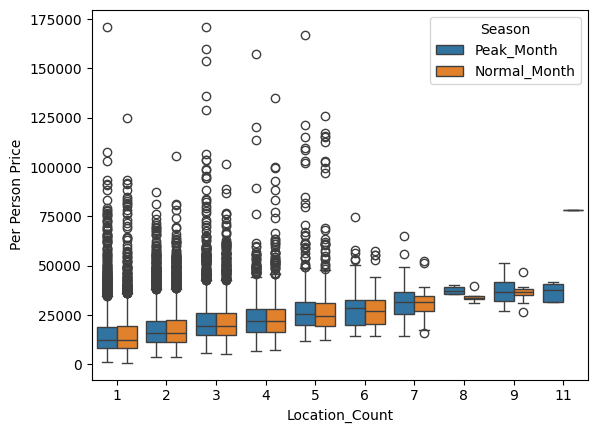

In [366]:
# Lets visualize the Location Count with Per Person Price
sns.boxplot(x = "Location_Count", y  ="Per Person Price", data = combined, hue = "Season")
plt.show()

In [122]:
# Similarly lets handle Sight Seeing Places

combined["Sightseeing Places Covered"].unique()

array(['Not Available',
       ' Dal Lake | Avantipura Ruins | Mughal Gardens | Cheshma Shahi | Nishat Bagh | Shalimar Garden | Shankaracharya Temple ',
       ' Lake Pichola | Jag Mandir Palace | Saheliyon ki Bari | Maharana Pratap Smarak | Vintage Car Museum | City Palace | Crystal Gallery | Chittorgarh Fort ',
       ...,
       " Corbyn's Cove | Anthropological Museum | Samudrika Marine Museum | Shopping emporium | Cellular Jail | Anthropological Museum (Entry Ticket) | Samudrika Museum (Entry Ticket) | Light and Sound Show at Cellular Jail, Port Blair (Entry Ticket) | Entry ticket to Cellular Jail (Entry Ticket) | Ross Island | Chidiya Tapu | Ross Island Visit (Entry Ticket) | Sunset Picnic at Chidiya Tapu Beach in Port Blair - MMT (Entry Ticket) ",
       ' Transfer for Luxury Dinner Cruise TSG Bella Bay - MMT | Luxury Dinner Cruise aboard the TSG Bella Bay Cruise Ship, Port Blair (Without Transfers) - MMT | Entry ticket to Cellular Jail (Entry Ticket) | Light and Sound Show at C

In [367]:
combined["Count_SightSeeing"] = combined["Sightseeing Places Covered"].apply(regex_tokens)

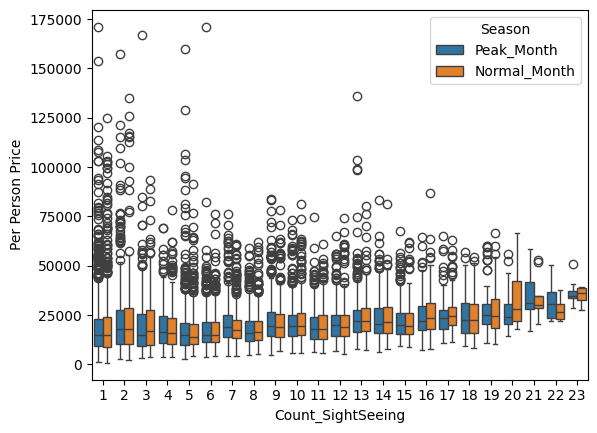

In [368]:
# Lets visualize the Location Count with Per Person Price
sns.boxplot(x = "Count_SightSeeing", y  ="Per Person Price", data = combined, hue = "Season")
plt.show()

In [369]:
pd.set_option('display.max_columns', 50)
combined.head()

,Uniq Id,Package Name,Package Type,Destination,Itinerary,Places Covered,Travel Date,Hotel Details,Start City,Airline,Flight Stops,Meals,Sightseeing Places Covered,Cancellation Rules,Per Person Price,Date,Month,Year,Season,Peak_Days,Location_Count,Count_SightSeeing
0,e788ab76d9d8cf1e6ed2f139645ca5d1,Best of Shimla and Manali Holiday from Delhi,Standard,New Delhi|Shimla|Manali|Chandigarh,1N New Delhi . 2N Shimla . 2N Manali . 1N Chan...,New Delhi|Shimla|Manali|Chandigarh,2021-07-30,Not Available,Mumbai,Not Available,2,3,Not Available,Not Available,11509.0,30,7,2021,Peak_Month,normal_days,4,1
1,178f892630ce3e335a5a41d5d83937fd,Kashmir Valley vacation,Premium,Srinagar|Pahalgam|Srinagar,1N Srinagar . 2N Pahalgam . 1N Srinagar,Srinagar|Pahalgam|Srinagar,2021-12-08,The Orchard Retreat & Spa:4.6|WelcomHotel Pine...,New Delhi,IndiGo|IndiGo,0,5,Dal Lake | Avantipura Ruins | Mughal Gardens ...,Cancellation any time after making the 1st pay...,22485.5,8,12,2021,Normal_Month,normal_days,3,7
2,f060f2954840503cc2fdaf495357b7df,Might of Mewar- Udaipur and Chittorgarh,Luxury,Udaipur|Chittorgarh,2N Udaipur . 1N Chittorgarh,Udaipur|Chittorgarh,2021-04-26,The Ananta:4.4|juSTa Lake Nahargarh Palace:4,New Delhi,IndiGo,0,4,Lake Pichola | Jag Mandir Palace | Saheliyon ...,Cancellation any time after making the 1st pay...,12421.5,26,4,2021,Peak_Month,normal_days,2,8
3,32a19a6c171e67448f2346da46c619dc,Colorful Kerala ( Romantic Getaway ),Premium,Munnar|Kumarakom|Allepey|Kovalam and Poovar,2N Munnar . 1N Kumarakom . 1N Allepey . 2N Kov...,Munnar|Kumarakom|Allepey|Kovalam and Poovar,2021-08-27,Elixir Hills Suites Resort & Spa-MMT Holidays ...,New Delhi,IndiGo,0,5,Mattupetty Dam | Echo Point | Tata Tea Museum...,Cancellation any time after making the 1st pay...,35967.0,27,8,2021,Normal_Month,peak_days,4,9
4,107b068aa0ca03bc6248966f594d105f,A Week In Bangkok & Pattaya,Premium,Pattaya|Bangkok,4N Pattaya . 3N Bangkok,Pattaya|Bangkok,2021-12-12,Dusit Thani Pattaya - MMT Special:4.5|Amari Wa...,New Delhi,Spicejet|Go Air,0,5,"Coral Island Tour with Indian Lunch, Join Spe...",Cancellation any time after making the 1st pay...,25584.0,12,12,2021,Normal_Month,normal_days,2,2


In [370]:
# Lets look into Airline

combined["Airline_Count"]
= combined["Airline"].apply(regex_tokens)

In [384]:
combined.shape

(30000, 23)

In [385]:
# lets drop some of the columns

new = combined.drop(["Uniq Id", "Destination", "Places Covered", "Airline", "Travel Date",
                    "Sightseeing Places Covered", "Cancellation Rules"], axis = 1)

In [387]:
new.head(2)

,Package Name,Package Type,Itinerary,Hotel Details,Start City,Flight Stops,Meals,Per Person Price,Date,Month,Year,Season,Peak_Days,Location_Count,Count_SightSeeing,Airline_Count
0,Best of Shimla and Manali Holiday from Delhi,Standard,1N New Delhi . 2N Shimla . 2N Manali . 1N Chan...,Not Available,Mumbai,2,3,11509.0,30,7,2021,Peak_Month,normal_days,4,1,1
1,Kashmir Valley vacation,Premium,1N Srinagar . 2N Pahalgam . 1N Srinagar,The Orchard Retreat & Spa:4.6|WelcomHotel Pine...,New Delhi,0,5,22485.5,8,12,2021,Normal_Month,normal_days,3,7,2


In [388]:
# lets start with Package Name

new["Package Name"].unique()

array(['Best of Shimla and Manali Holiday from Delhi',
       'Kashmir Valley vacation',
       'Might of Mewar- Udaipur and Chittorgarh', ...,
       'Unique Kerala Backwater Experience - Purity at Lake Vembanad',
       'Himachal Hues 6 Nights from Delhi - Shared Vehicle',
       'Ladakh Holiday with Pangong Excursion (With Flights)'],
      dtype=object)

In [389]:
# Lets apply the function....
import re
def clean_text(text):
    text = re.sub("(www.+)|(\s+)|(@[a-zA-Z]+)|\W+", " ", text) # removes hyperlinks, special chars
    text = re.sub('(\w+:/\S+)', " ", text)
    # Remove HTML tags
    text = re.sub(r'<.*?>', '', text)
    text = re.sub(r'\s+', ' ', text).strip()
    text = re.sub("http|https", " ", text)
    text = re.sub("[^a-zA-Z]+", " ", text)
    return(text)

In [390]:
new["Package Name"] = new["Package Name"].apply(clean_text)

In [392]:
import string
noise = string.punctuation

new["Package Name"] = [word for word in new["Package Name"] if word not in noise]

In [394]:
# lets Tokenize the Package Name
from nltk.tokenize import sent_tokenize
sent_tokens = [sent_tokenize(word) for word in new["Package Name"]]

In [395]:
from nltk.corpus import stopwords
nltk.download("stopwords")
stop = stopwords.words("english")

all_tokens = [token for review_token in sent_tokens for token in review_token if token not in stop]

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\mukul\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [396]:
from nltk.probability import FreqDist
package = pd.DataFrame(FreqDist(all_tokens).items(), 
                       columns=["Package Name", "Demand"]).sort_values(ascending = False, by="Demand")

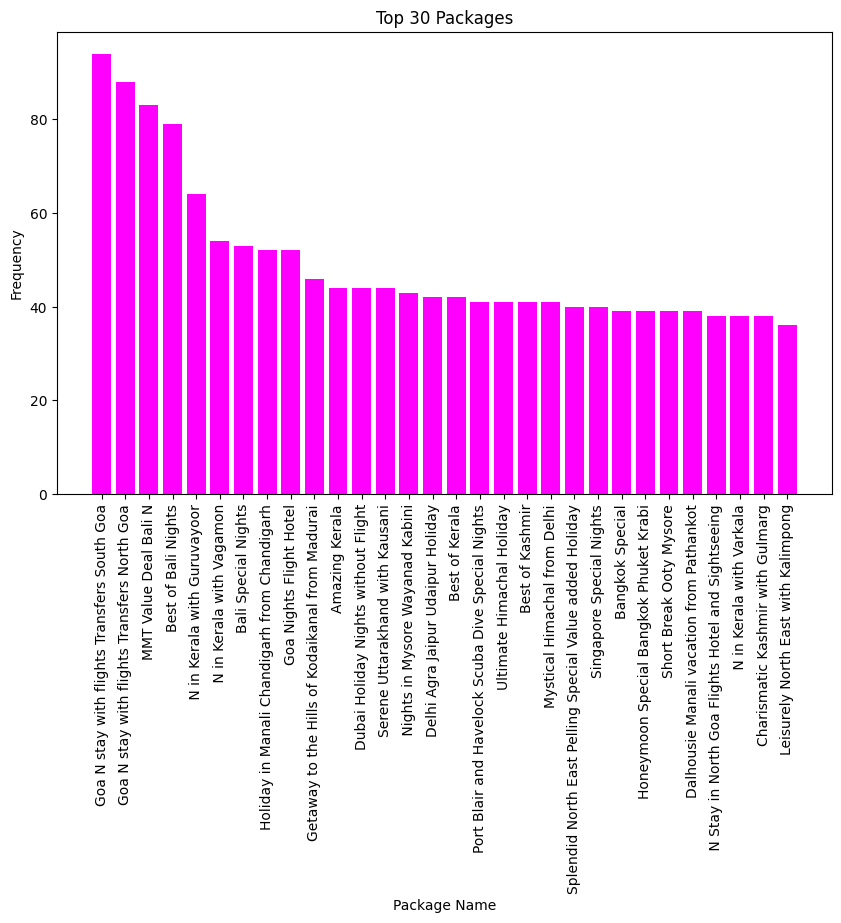

In [397]:
# Plot a bar chart to visualize the packages in demand
plt.figure(figsize=(10, 6))
plt.bar(package['Package Name'][:30], package['Demand'][:30], color='magenta')
plt.title('Top 30 Packages')
plt.xlabel('Package Name')
plt.ylabel('Frequency')
plt.xticks(rotation=90)
plt.show()

In [399]:
# lets map the Demand to the Package in the Original Data....

new = pd.merge(left = new, right = package, on = "Package Name", how = 'inner')

In [402]:
# lets generate the Hotel Count

new["Hotel_Count"] = new["Hotel Details"].apply(regex_tokens)

In [403]:
# Lets look into Itinerary

new['Itinerary'].unique()[:4]

array(['1N New Delhi . 2N Shimla . 2N Manali . 1N Chandigarh',
       '1N Srinagar . 2N Pahalgam . 1N Srinagar',
       '2N Udaipur . 1N Chittorgarh',
       '2N Munnar . 1N Kumarakom . 1N Allepey . 2N Kovalam and Poovar'],
      dtype=object)

In [404]:
# Lets make a function to extract the Days of travel

def travel_duration(text):
    text = re.sub("\D", "", text)
    text = list(text)
    count = pd.to_numeric(text).sum()
    return(count) 

#pd.to_numeric(list(re.sub("\D", "", new['Itinerary'][0]))).sum()

In [405]:
new["Holidays"] = new['Itinerary'].apply(travel_duration)

In [242]:
# Step 1: Import necessary libraries
import spacy
from collections import Counter

# Load the spaCy model
nlp = spacy.load("en_core_web_sm")

# Step 2: Prepare your data
data = [
    '1N New Delhi 2N Shimla 2N Manali 1N Chandigarh',
    '1N Srinagar 2N Pahalgam 1N Srinagar',
    '2N Udaipur 1N Chittorgarh',
    '2N Munnar 1N Kumarakom 1N Allepey 2N Kovalam and Poovar']

# Step 3: Apply NER to extract locations
locations = []
for item in data:
    doc = nlp(item)
    for ent in doc.ents:
        if ent.label_ == "GPE":
            locations.append(ent.text)

# Step 4: Count locations
location_counts = Counter(locations)
print(location_counts)


Counter({'New Delhi': 1})


**Note that Spacy is not able to extract the Locations completely and thus, I would be using Stanford Core NLP Package available under Stanza. Lets install stanza and download the english model followed by creating a pipeline for ner.**

In [287]:
# We will be using Stanford Core NLP to trouble shoot the above problem

# Install stanza
#!pip install stanza

# Import stanza
import stanza

# Download the English model (this only needs to be done once)
stanza.download('en')

# Initialize the English NLP pipeline
nlp = stanza.Pipeline(lang='en', processors='tokenize,ner')

2024-04-04 00:05:09 INFO: Downloaded file to C:\Users\mukul\stanza_resources\resources.json
2024-04-04 00:05:09 INFO: Downloading default packages for language: en (English) ...
2024-04-04 00:05:11 INFO: File exists: C:\Users\mukul\stanza_resources\en\default.zip
2024-04-04 00:05:15 INFO: Finished downloading models and saved to C:\Users\mukul\stanza_resources
2024-04-04 00:05:15 INFO: Checking for updates to resources.json in case models have been updated.  Note: this behavior can be turned off with download_method=None or download_method=DownloadMethod.REUSE_RESOURCES
2024-04-04 00:05:16 INFO: Downloaded file to C:\Users\mukul\stanza_resources\resources.json
2024-04-04 00:05:16 WARNING: Language en package default expects mwt, which has been added
2024-04-04 00:05:17 INFO: Loading these models for language: en (English):
| Processor | Package                   |
-----------------------------------------
| tokenize  | combined                  |
| mwt       | combined                 

In [241]:
# Your data
data = [
    '1N New Delhi 2N Shimla 2N Manali 1N Chandigarh',
    '1N Srinagar 2N Pahalgam 1N Srinagar',
    '2N Udaipur 1N Chittorgarh',
    '2N Munnar 1N Kumarakom 1N Allepey 2N Kovalam and Poovar'
]

# Function to extract locations using Stanford NLP
def extract_locations(data):
    locations = []
    for item in data:
        doc = nlp(item)
        for sentence in doc.sentences:
            for ent in sentence.ents:
                if ent.type == "GPE":
                    locations.append(ent.text)
    return locations

# Extract and count locations
locations = extract_locations(data)
from collections import Counter
location_counts = Counter(locations)
print(location_counts)

Counter({'Srinagar': 2, 'Shimla': 1, 'Manali': 1, 'Chandigarh': 1, 'Udaipur': 1, 'Chittorgarh': 1, 'Kovalam': 1})


In [251]:
new['Itinerary'].unique()[0]

'1N New Delhi . 2N Shimla . 2N Manali . 1N Chandigarh'

In [407]:
# Clean Itinerary and then deploy NER
def ner_cleaning(text):
    text = re.sub('\dN|[^a-zA-Z]|\s+', " ", text).strip()
    return(text)

#re.sub('\dN|[^a-zA-Z]|\s+', " ", new['Itinerary'].unique()[0]).strip()

new["Itinerary"] = new["Itinerary"].apply(ner_cleaning)

In [288]:
# Function to extract locations using Stanford NLP
def extract_locations(data):
    locations = []
    for item in data:
        doc = nlp(item)
        for sentence in doc.sentences:
            for ent in sentence.ents:
                if ent.type == "GPE":
                    locations.append(ent.text)
    return locations

# Extract and count locations
locations = extract_locations(new["Itinerary"])
from collections import Counter
location_counts = Counter(locations)
print(location_counts)

Counter({'New Delhi': 1497, 'Goa': 1364, 'Srinagar': 1317, 'Shimla     Manali     Chandigarh': 937, 'Udaipur': 772, 'Jaipur': 697, 'Shimla     Manali': 683, 'Gangtok': 568, 'Gangtok     Pelling     Darjeeling': 517, 'Shimla     Manali     Dharamshala': 510, 'Darjeeling     Gangtok': 436, 'Pahalgam     Srinagar': 402, 'Singapore': 398, 'Dubai': 391, 'Munnar': 391, 'Agra     Jaipur': 390, 'Ooty     Kodaikanal': 378, 'Dharamshala': 328, 'Gangtok     Darjeeling': 327, 'Mount Abu': 322, 'Bali': 302, 'Amritsar': 300, 'Ooty': 298, 'Mysore     Ooty': 277, 'Mysore     Coorg     Ooty': 268, 'Jaipur     Jodhpur': 266, 'Gulmarg     Srinagar': 257, 'Coorg': 255, 'Dalhousie     Chandigarh': 243, 'Kuala Lumpur': 237, 'Manali     Chandigarh': 223, 'Cochin     Munnar     Thekkady': 216, 'Coorg     Ooty': 214, 'Kodaikanal': 202, 'Nainital': 197, 'Lachung     Gangtok': 194, 'Shimla': 183, 'Manali': 177, 'Bangalore     Mysore     Ooty': 177, 'Niel Island': 170, 'Jaisalmer': 160, 'Jaisalmer     Bikaner': 1

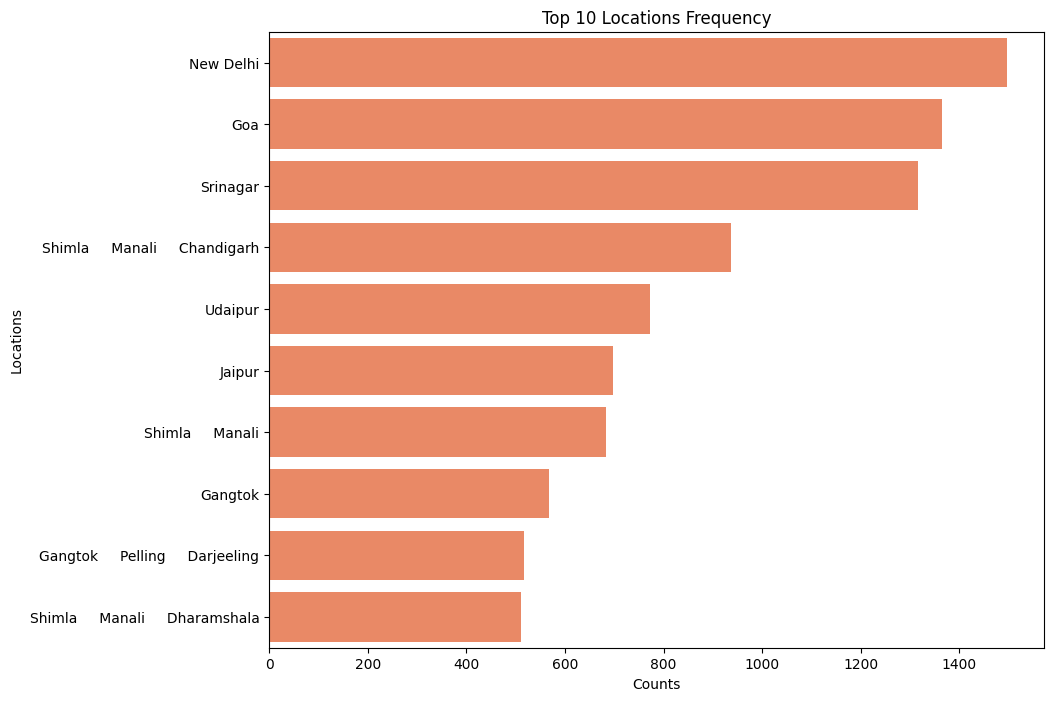

In [319]:
# Word embeddings, topic modelling, Chatbot, BERT, Hugging face, Gen AI + Front End.

# Extract the top 10 most common entries
top_10_data = location_counts.most_common(10)

# Separating the location names and their counts for plotting
locations, counts = zip(*top_10_data)

# Setting up the figure for plotting
plt.figure(figsize=(10, 8))

# Creating a bar plot
sns.barplot(x=counts, y=locations, color="coral")

# Setting the labels and title of the plot
plt.xlabel('Counts')
plt.ylabel('Locations')
plt.title('Top 10 Locations Frequency')

# Finally, displaying the plot
plt.show()

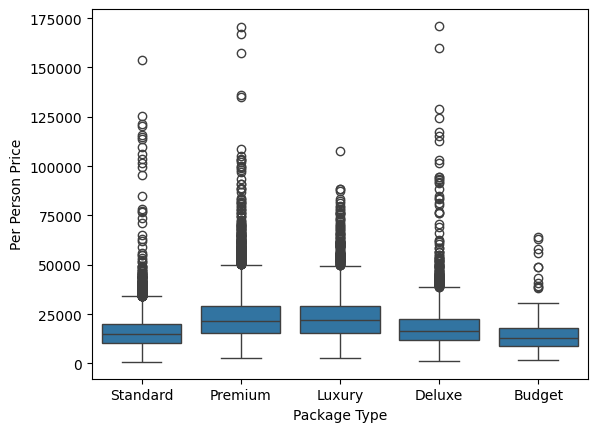

In [408]:
sns.boxplot(x = "Package Type", 
            y = "Per Person Price",
           data = new)
plt.show()

In [409]:
new.groupby("Package Type")["Per Person Price"].describe()

,count,mean,std,min,25%,50%,75%,max
Package Type,,,,,,,,
Budget,466.0,14151.447425,8236.467588,1757.0,8901.25,13114.25,17927.00,64008.5
Deluxe,5986.0,18405.166889,10241.971634,1198.0,12108.50,16411.75,22774.25,171062.5
Luxury,3271.0,23621.649954,11882.355881,2963.0,15460.50,22204.00,29131.50,107850.0
Premium,5567.0,23932.728938,13252.302967,2967.0,15219.75,21748.00,29150.75,170763.0
Standard,5657.0,16351.466944,9367.948050,791.0,10553.50,14712.50,19961.50,153795.0


In [410]:
dict_ = {"Luxury": 2, "Premium": 4, 
         "Deluxe": 5, "Standard":3, "Budget":1}

new["Package Type"] = new["Package Type"].map(dict_)

In [413]:
# Drop the Remaining Columns

new.drop(["Package Name", "Itinerary", "Hotel Details", "Date", "Month", "Year"], axis = 1, inplace = True)
new.shape

(29925, 13)

In [414]:
29925-9000

20925

In [446]:
# Split the Data in Train and Test

newtrain = new.loc[0:20925, :]
newtest = new.loc[20925:, :]

newtrain.shape, newtest.shape, train.shape, test.shape

((20926, 13), (9000, 13), (21000, 15), (9000, 14))

In [447]:
newtest.drop("Per Person Price", axis = 1, inplace = True)

dummytrain = pd.get_dummies(newtrain, drop_first = True)
dummytest = pd.get_dummies(newtest, drop_first = True)

X = dummytrain.drop("Per Person Price", axis = 1)
y = dummytrain["Per Person Price"]

In [460]:
# Modelling

from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from xgboost import XGBRegressor
from lightgbm import LGBMRegressor

In [461]:
# Base Models

def base_models():
    models = dict()
    models["LR"] = LinearRegression()
    models["DTree"] = DecisionTreeRegressor()
    models["RF"] = RandomForestRegressor()
    models["GBM"] = GradientBoostingRegressor()
    models["XGB"] = XGBRegressor()
    models["LGBM"] = LGBMRegressor()
    return models

In [462]:
# Function to evaluate the models...
from sklearn.model_selection import KFold, cross_val_score

def eval_models(model):
    cv = KFold(n_splits=5, shuffle = True, random_state = 1001)
    scores = -cross_val_score(estimator = model, X = X, 
                             y = y, cv = cv,
                            scoring="neg_mean_squared_error",
                            n_jobs=-1)
    return scores

In [463]:
# Lets use the functions to calculate the scores...

models = base_models()

result, names = list(), list()

for name, mymodel in models.items():
    finalscore = eval_models(mymodel)
    result.append(finalscore)
    names.append(name)
    print(name, n
          \p.mean(result))

LR 66886590.35297153
DTree 64042162.573047005
RF 55858625.38881543
GBM 55476289.17276198
XGB 52580392.478127964
LGBM 51273815.885336794


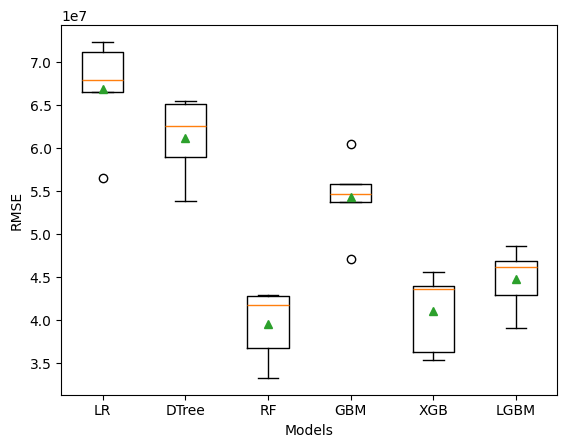

In [464]:
# Plot the results...

plt.boxplot(result, labels = names, showmeans = True)
plt.xlabel("Models")
plt.ylabel("RMSE")
plt.show()

In [453]:
#X["Peak_Days_peak_days"] = X["Peak_Days_peak_days"].map({True:1, False:0})
#X["Start City_New Delhi"] = X["Start City_New Delhi"].map({True:1, False:0})

In [465]:
# Stacking Regressor
from sklearn.ensemble import StackingRegressor
LGBM = LGBMRegressor()
XGB = XGBRegressor()
RF = RandomForestRegressor()
# ('lr', RidgeCV()),('svr', LinearSVR(dual="auto", random_state=42))
stack = StackingRegressor(estimators = [('LGBM', LGBM), 
                                        ("RF", RF)], 
                         final_estimator=XGB,
                          cv = 5)

predictions = stack.fit(X, y).predict(dummytest)

[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000935 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 144
[LightGBM] [Info] Number of data points in the train set: 20926, number of used features: 12
[LightGBM] [Info] Start training from score 20037.510155
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001137 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 143
[LightGBM] [Info] Number of data points in the train set: 16740, number of used features: 12
[LightGBM] [Info] Start training from score 20048.216458
[LightGBM] [Warning] F

In [466]:
submission = pd.DataFrame({"Per Person Price":predictions})
submission.head()

,Per Person Price
0,20423.312500
1,17018.427734
2,29573.197266
3,24824.031250
4,16227.849609


In [469]:
submission.to_csv("Stack_LGBM.csv", index = False)

In [468]:
cd

C:\Users\mukul
